## TIOBE INDEX
https://www.tiobe.com/tiobe-index/

# 문제1
- TIOBE INDEX의 상위 9개 언어에 R(14위)까지해서 총 10개 언어에 대해 출판책 정보 수집
- 네이버 API 이용
- 주의사항
    - 펄 이라는 언어는 유명한 작과 펄과 혼동할 수 있음
    - Python과 파이썬 처럼 영어와 한글을 합쳐야 할 수도 있음
    - API 검색어 제한 주의

In [81]:
import pandas as pd
import urllib.request
import json

from urllib.request import urlopen 
from bs4 import BeautifulSoup

In [82]:
# TIOBE Index 가져오기
url = "https://www.tiobe.com/tiobe-index/"
response = urlopen(url)
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <title>
   index | TIOBE - The Software Quality Company
  </title>
  <link href="//fonts.googleapis.com/css?family=Roboto:300,400,500,700" rel="stylesheet" type="text/css"/>
  <link href="//fonts.googleapis.com/css?family=Roboto+Slab:300" rel="stylesheet" type="text/css"/>
  <link href="/images/tiobe.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/stylesheets/normalize.css" rel="stylesheet"/>
  <link href="/stylesheets/main_prefixed.css?1623057826709" rel="stylesheet"/>
  <link href="/stylesheets/slicknav.min.css" rel="stylesheet">
   <meta content="width=device-width, initial-scale=1" name="viewport">
    <script src="/js/jquery-1.8.0.release.js" type="text/javascript">
    </script>
    <script src="/js/vendor/modernizr-2.6.2.min.js">
    </script>
    <script src="//ajax.googleapis.com/ajax/libs/jquery/1.10.2/jquery.min.js">
    </script>
    <script src=

In [22]:
# 테이블을 찾아서 변수에 저장
table = soup.find('table', 'table table-striped table-top20')
table

<table class="table table-striped table-top20" id="top20">
<thead><tr>
<th style="width: 15%">Oct 2021</th>
<th style="width: 15%">Oct 2020</th>
<th style="width: 15%" title="Difference compared to last year">Change</th>
<th colspan="2" style="width: 25%">Programming Language</th>
<th style="width: 15%">Ratings</th>
<th style="width: 15%" title="Difference compared to last year">Change</th>
</tr></thead>
<tbody>
<tr><td>1</td><td>3</td><td><img alt="change" src="/images/up.png"/></td><td class="td-top20"><img alt="Python page" src="images/Python.png" style="vertical-align:middle"/></td><td>Python</td><td>11.27%</td><td>-0.00%</td></tr><tr><td>2</td><td>1</td><td><img alt="change" src="/images/down.png"/></td><td class="td-top20"><img alt="C page" src="images/C.png" style="vertical-align:middle"/></td><td>C</td><td>11.16%</td><td>-5.79%</td></tr><tr><td>3</td><td>2</td><td><img alt="change" src="/images/down.png"/></td><td class="td-top20"><img alt="Java page" src="images/Java.png" styl

In [83]:
# pandas로 테이블 읽기
df = pd.read_html(str(table))[0]
df.drop(['Change','Programming Language'], axis = 1, inplace = True) # 이미지등 NaN으로 불러와 진 값 제거
df.head(14)

,Oct 2021,Oct 2020,Programming Language.1,Ratings,Change.1
0,1,3,Python,11.27%,-0.00%
1,2,1,C,11.16%,-5.79%
2,3,2,Java,10.46%,-2.11%
3,4,4,C++,7.50%,+0.57%
4,5,5,C#,5.26%,+1.10%
5,6,6,Visual Basic,5.24%,+1.27%
6,7,7,JavaScript,2.19%,+0.05%
7,8,10,SQL,2.17%,+0.61%
8,9,8,PHP,2.10%,+0.01%
9,10,17,Assembly language,2.06%,+0.99%


In [84]:
# 추출할 10개 언어 = index 기준 0~8 + 13 번째
need_languages = df.iloc[[i for i in range(9)] + [13],:]['Programming Language.1'].values
need_languages

array(['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'R'], dtype=object)

In [85]:
# 한글이름 만들기
need_lang_kor = {'Python':'파이썬',
                 'C':None,
                 'Java':'자바',
                 'C++':None,
                 'C#':None,
                 'Visual Basic':'비주얼베이직',
                 'JavaScript':'자바스크립트',
                 'SQL':None,
                 'PHP':None,
                 'R':None
                }

In [86]:
# 다른 파일에 저장해 놓은 네이버 client_id, client_secret 불러오기
import my_api
client_id, client_secret = my_api.get_my_naver_api()

In [87]:
# api로 검색결과 불러오는 함수
def get_result_onpage(category, keyword, start_num = 1, disp_num = 100):
    encText = urllib.parse.quote(keyword) # 검색할 단어(한글 디코딩을 위해 사용)
    url = f'https://openapi.naver.com/v1/search/{category}.json?query={encText}&display={disp_num}&start={start_num}'
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    return json.loads(response.read())

In [89]:
req_result = get_result_onpage('book', '파이썬', 1, 100)
req_result

{'lastBuildDate': 'Wed, 20 Oct 2021 21:20:27 +0900',
 'total': 1381,
 'start': 1,
 'display': 100,
 'items': [{'title': '이것이 취업을 위한 코딩 테스트다 with <b>파이썬</b> (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드, C/C++, 자바 코드 제공)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16439154',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/164/391/16439154.jpg?type=m1&udate=20200928',
   'author': '나동빈',
   'price': '34000',
   'discount': '30600',
   'publisher': '한빛미디어',
   'pubdate': '20200805',
   'isbn': '1162243074 9791162243077',
   'description': '8가지 핵심 알고리즘 이론을 쉽게 설명하고, 관련 실전 문제를 풀이했다. 출제 유형 분석, 이론 설명, 기출문제 풀이까지! 어떤 코딩 테스트도 이 책 한 권으로 대비할 수 있을 것이다. 코딩 테스트에서 주로 선택하는 <b>파이썬</b>을 기반으로 설명되어 있으며, <b>파이썬</b> 코드 외에도 C/C++, 자바 코드를 추가로 제공한다.'},
  {'title': 'Do it! 점프 투 <b>파이썬</b>',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=15052904',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/150/529/15052904.jpg?type=m1&udate=20200910',
   'author': '박응용',
   'price': '18800',
  

In [90]:
# 전체 1381개 검색결과... API의 start = 1000, display = 100 이 최대값으로 제한되어 있음.. => 총 1100건만 추출 가능
# 검색결과 그 이상은 제휴서비스(유료)를 이용해야 함
req_result['total']

1381

In [91]:
# 우선 10개 언어의 총 개수를 출력해보기
for lang in need_languages: 
    total_num = 0
    req_result = get_result_onpage('book', lang, 1, 100)
    total_num += req_result["total"]
    if need_lang_kor[lang] != None:
        req_result = get_result_onpage('book', need_lang_kor[lang], 1, 100)
        total_num += req_result["total"]
    print(f'{lang}: {total_num}')

Python: 8052
C: 481036
Java: 21081
C++: 7906
C#: 3519
Visual Basic: 9439
JavaScript: 6343
SQL: 10352
PHP: 17819
R: 444331


### 두가지 난관에 봉착함
- 1. C, R등 단어길이가 짧은 경우 검색결과가 훨씬 많다.(해당 언어와 상관없는 내용들이 같이 검색 됨...)
- 2. 검색결과가 1100건이 넘는 경우 API 이용 불가

### 생각해본 해결방안
- 1. 검색어 뒤에 ' 언어'를 포함하여 검색
    - 모든 언어에 검색결과에 언어를 붙임으로 좀 더 정확하게 검색
    - 반면 실제로는 해당 언어 관련 책인데 겹치지 않
- 2. 카테고리를 컴퓨터/IT로 한정 - 상세검색 활용필요, 단독사용 불가
    - 네이버 개발자 홈페이지에 카테고리를 지정하여 검색할 수 있음
        - https://developers.naver.com/docs/serviceapi/search/book/book.md#%EC%B1%85
    - 해외도서는 제외됨. 이번 과제의 대상이 한국에서 출판된 프로그래밍 언어이므로 합리적임
    - 카테고리가 컴퓨터/IT가 아니더라도 관련언어일 수 있음(ex. 파이썬을 활용한 금융공학 레시피 - 경제/경영 으로 분류됨)
- 3. title 한정 검색 - 상세검색 활용필요
    - 네이버 개발자 홈페이지에 책 이름을 가지고 검색할 수 있음
- 4. 필요한 경우 웹 크롤링
    - 1100건 넘는 결과에 대한 크롤링 시도

In [92]:
# 뒤에 언어를 붙여서 검색해보자
for lang in need_languages: 
    total_num = 0
    req_result = get_result_onpage('book', lang+' 언어', 1, 100)
    total_num += req_result["total"]
    if need_lang_kor[lang] != None:
        req_result = get_result_onpage('book', need_lang_kor[lang]+ ' 언어', 1, 100)
        total_num += req_result["total"]
    print(f'{lang}: {total_num}')

Python: 1632
C: 15974
Java: 5177
C++: 1922
C#: 585
Visual Basic: 1596
JavaScript: 1861
SQL: 2116
PHP: 544
R: 9752


### -> 검색결과 차이가 많이 남
- 전체적으로 검색 결과가 크게 줄어듦
- 그럼에도 불구하고 적지않음. 특히 R과 검색결과 아직도 해당 언어와 상관없는 검색결과가 다수 존재

In [93]:
req_result = get_result_onpage('book', 'R 언어', 1, 100)
req_result

{'lastBuildDate': 'Wed, 20 Oct 2021 21:20:48 +0900',
 'total': 9752,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>R언어</b> 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=20918555',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/209/185/20918555.jpg?type=m1&udate=20211013',
   'author': '박성호|문경희|양자영|이윤정|조미숙',
   'price': '24000',
   'discount': '22800',
   'publisher': '부산대학교출판문화원',
   'pubdate': '20210831',
   'isbn': '8973167197 9788973167197',
   'description': '4차 산업혁명의 시대에는 우리에게 주어진 문제를 프로그래밍 언어를 활용하여 해결할 수 있는 역량을... 본 교재에서는 <b>R언어</b>를 사용하여 인문학, 사회학, 경제학 등 컴퓨터를 전공하지 않는 학생들도 쉽고 간단하게 컴퓨터 프로그래밍을 이용하여 주어진 문제를 해결하는 방법을 기술하고 있다. 특히, <b>R언어</b>는... '},
  {'title': '문과생을 위한 <b>R언어</b> 활용 데이터 시각화와 전자지도 개발 (컬러판)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=21144197',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/211/441/21144197.jpg?type=m1&udate=20211015',
   'author': '한영수 김지윤',
   'price': '16800

In [94]:
# 검색어 + 책 이름으로 검색해보자
import xmltodict

def get_result_adv(keyword, d_catg = None, d_titl = None, start_num = 1, disp_num = 100, ):
    encText = urllib.parse.quote(keyword) # 검색할 단어(한글 디코딩을 위해 사용)
    url = f'https://openapi.naver.com/v1/search/book_adv.xml?query={encText}&display={disp_num}&start={start_num}'
    if d_titl != None:
        title = urllib.parse.quote(d_titl)
        url += f'&d_titl={title}'
    if d_catg != None:
        url += f'&d_catg={d_catg}'
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    
    cc = xmltodict.parse(response.read().decode('utf-8')) # return collections.OrderedDict
    dd = json.loads(json.dumps(cc)) # return dict
    
    return dd['rss']['channel']

for lang in need_languages: 
    total_num = 0
    req_result = get_result_adv(lang, None, lang, 1, 100)
    total_num += int(req_result["total"])
    if need_lang_kor[lang] != None:
        req_result = get_result_adv(need_lang_kor[lang], None, need_lang_kor[lang], 1, 100)
        total_num += int(req_result["total"])
    print(f'{lang}: {total_num}')

Python: 5313
C: 93235
Java: 10003
C++: 4885
C#: 2144
Visual Basic: 2774
JavaScript: 2268
SQL: 3994
PHP: 3877
R: 111300


In [95]:
# 검색어 + 책 이름 + 카테고리를 정해보자(카테고리는 단독사용 불가)
for lang in need_languages: 
    total_num = 0
    req_result = get_result_adv(lang, 280, lang, 1, 100)
    total_num += int(req_result["total"])
    if need_lang_kor[lang] != None:
        req_result = get_result_adv(need_lang_kor[lang], 280, need_lang_kor[lang], 1, 100)
        total_num += int(req_result["total"])
    print(f'{lang}: {total_num}')

Python: 872
C: 2554
Java: 1626
C++: 1040
C#: 304
Visual Basic: 690
JavaScript: 494
SQL: 462
PHP: 203
R: 385


In [96]:
# 검색어에 언어를 붙이고 + 책 이름 + 카테고리를 정해보자(카테고리는 단독사용 불가) - 언어를 붙이나 안붙이나 결과가 같음!
for lang in need_languages: 
    total_num = 0
    req_result = get_result_adv(lang+' 언어', 280, lang, 1, 100)
    total_num += int(req_result["total"])
    if need_lang_kor[lang] != None:
        req_result = get_result_adv(need_lang_kor[lang]+' 언어', 280, need_lang_kor[lang], 1, 100)
        total_num += int(req_result["total"])
    print(f'{lang}: {total_num}')

Python: 872
C: 2554
Java: 1626
C++: 1040
C#: 304
Visual Basic: 690
JavaScript: 494
SQL: 462
PHP: 203
R: 385


## -> 최종안: 검색어 + 책 이름 + 카테고리로 검색하고, 1100건이 넘는 결과는 크롤링 시도
- 앞서 언급한 바와 같이, 실제로 해당 언어 관련 책이지만 제외되는 건이 존재
    - 추후 분석 시 모든 언어가 동일한 비율로 제외된다고 가정
- 한글로도 검색가능한 파이썬, 자바, 비주얼베이직, 자바스크립트는 한글로 검색한 결과를 합친 후 중복제거
- 1100건 초과하는 경우 크롤링: C, Java

In [97]:
# 최대 1100건까지 해당 결과를 API로 받아오기
# 한 언어에 대해 먼저 시도: 파이썬
req_result = get_result_adv(need_languages[0], 280, need_languages[0], 1, 99)
req_result

{'title': "Naver Open API - book_adv ::''",
 'link': 'https://search.naver.com',
 'description': 'Naver Search Result',
 'lastBuildDate': 'Wed, 20 Oct 2021 21:21:12 +0900',
 'total': '202',
 'start': '1',
 'display': '99',
 'item': [{'title': 'Effective <b>Python</b> 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑하게 코딩하는 법, 개정판)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16876960',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/168/769/16876960.jpg?type=m1&udate=20201222',
   'author': '브렛 슬라킨 지음|오현석',
   'price': '32000',
   'discount': '28800',
   'publisher': '길벗',
   'pubdate': '20201030',
   'isbn': '1165213192 9791165213190',
   'description': '아마존 파이썬 프로그래밍 분야 베스트셀러, 〈Effective <b>Python</b>〉 전면 개정 증보판! \n파이썬의 매력과 강점을 이용해 강력하고 우수한 성능의 코드를 작성하는 90가지 방법!\n파이썬다운 방식으로 프로그램을 작성하는 방법, 파이썬을 사용하는 가장 좋은 방법에 대한 통찰을 담았다! 2판에서는 파이썬 3....'},
  {'title': '파이썬 딥러닝 파이토치(<b>Python</b> Deep Learning PyTorch)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16778336',
   'i

In [98]:
total_num = int(req_result['total'])
req_result_kor = get_result_adv(need_lang_kor[need_languages[0]], 280, need_lang_kor[need_languages[0]], 1, 99)
total_num_kor =  int(req_result_kor['total'])
print(total_num, total_num_kor)

202 670


In [99]:
book_ls = req_result['item']
len(book_ls)

99

In [100]:
# 한번에 조회하기
req_result = get_result_adv(need_languages[0], 280, need_languages[0], 1, 99) # 검색 개수확인을 위해 먼저 99까지 조회
total_num = int(req_result['total'])
book_ls = req_result['item']
total_num = min(1000, total_num)
for i in range(100, int(total_num/100)*100+100, 100): # 100~검색 개수까지 조회(max시작점=1000)
    req_result = get_result_adv(need_languages[0], 280, need_languages[0], i, 100)
    book_ls += req_result['item']



In [101]:
len(book_ls)

202

In [102]:
if need_lang_kor[need_languages[0]] != None:  
    req_result = get_result_adv(need_lang_kor[need_languages[0]], 280, need_lang_kor[need_languages[0]], 1, 100)
    total_num = int(req_result['total'])
    book_kor_ls = req_result['item']
    total_num = min(1000, total_num)
    for i in range(101, int(total_num/100)*100+100, 100):
        req_result = get_result_adv(need_lang_kor[need_languages[0]], 280, need_lang_kor[need_languages[0]], i, 100)
        book_kor_ls += req_result['item']
len(book_kor_ls)

670

In [103]:
# 한 언어에 대해 최대 1100개 까지 조회하는 함수 만들기
def get_book_ls_api(language):
    req_result = get_result_adv(language, 280, language, 1, 99) # 검색 개수확인을 위해 먼저 99까지 조회
    total_num = int(req_result['total'])
    book_ls = req_result['item']
    total_num = min(1000, total_num) # 시작점 제한: 1000
    for i in range(100, int(total_num/100)*100+100, 100): # 100~검색 개수까지 조회(max시작점=1000)
        req_result = get_result_adv(language, 280, language, i, 100)
        book_ls += req_result['item']
        
    
    if need_lang_kor[language] != None:  
        req_result = get_result_adv(need_lang_kor[language], 280, need_lang_kor[language], 1, 100)
        total_num = int(req_result['total'])
        book_kor_ls = req_result['item']
        total_num = min(1000, total_num)
        for i in range(101, int(total_num/100)*100+100, 100):
            req_result = get_result_adv(need_lang_kor[language], 280, need_lang_kor[language], i, 100)
            book_kor_ls += req_result['item']
    else:
        book_kor_ls = []
    return book_ls + book_kor_ls


In [104]:
book_dict = {}
for ranguage in need_languages:
    book_dict[ranguage] = get_book_ls_api(ranguage)

In [105]:
for key, val in book_dict.items():
    print(f'{key}: {len(val)}')

Python: 872
C: 1099
Java: 1626
C++: 1040
C#: 304
Visual Basic: 690
JavaScript: 494
SQL: 462
PHP: 203
R: 385


In [106]:
# pickle에 저장해주기 - 데이터 타입 그대로 저장해주는 모듈
import pickle
with open('raw_book_dict.pickle', 'wb') as fw:
    pickle.dump(book_dict, fw)

In [107]:
with open('raw_book_dict.pickle', 'rb') as fr:
    raw_book_dict = pickle.load(fr)


### 다행히 자바는" java"+"자바"의 검색결과가 1626개! C만 추가로 크롤링해주면 됨

In [24]:
import time
from selenium import webdriver

# explictily wait
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [25]:
# 상세검색으로 책 제목:C, 카테고리:컴퓨터/IT 선택된 상태의 url을 가져옴
url = 'https://book.naver.com/search/search.naver?publishStartDay=&publishEndDay=&categoryId=280&serviceSm=advbook.basic&ic=service.summary&title=C&author=&publisher=&isbn=&toc=&subject=&cate1Depth=280&cate2Depth=&cate3Depth=&cate4Depth=&publishStartYear=&publishStartMonth=&publishEndYear=&publishEndMonth=&x=25&y=19'
driver = webdriver.Chrome('../driver/chromedriver')

driver.implicitly_wait(10) # 한번 선언하면 전역적으로 적용됨.
driver.get(url)

In [26]:
# 페이지가 열리면 검색결과 개수가 api의 total과 거의동일(2554 vs 2553)
# 1099건까지 api로 가져왔으므로, 1100부터 가져와야 함. 1100은 55페이지에 있음
# 화면 하단 "다음페이지"를 5번 클릭 후 55페이지를 클릭해야 함 

for i in range(5):
    WebDriverWait(driver, 5).\
    until(EC.presence_of_element_located((By.CSS_SELECTOR, "#content > div.paginate > a.next"))).click()
    time.sleep(3)

WebDriverWait(driver, 5).\
until(EC.presence_of_element_located((By.CSS_SELECTOR, "#content > div.paginate > a:nth-child(7)"))).click()
    


In [27]:
# 열린 페이지는 1081번부터 1100번까지 있음.1100번만 가져오자
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
page_ls = soup.select('#searchBiblioList > li')
len(page_ls)


20

In [28]:
# 필요정보: 제목, 링크, isbn, 가격, 저자, 출판사, 출판일 - isbn, price는 링크타고 상세조회해야 하므로 일단 비워두기
import re

add_c_ls = []
add_c_ls.append({
    'title':page_ls[19].dt.text.strip(),
    'link':page_ls[19].dt.a.get('href'),
    'isbn':None,
    'price':None,
    'writer':page_ls[19].dd.select('a')[0].text,
    'publisher': page_ls[19].dd.select('a')[1].text,
    'public_date': re.search(r'\d{4}.\d{2}.\d{2}', page_ls[19].dd.text).group(),
})
add_c_ls[0]

{'title': '원리를 일깨우는 C++ 프로그래밍',
 'link': 'http://book.naver.com/bookdb/book_detail.naver?bid=2927320',
 'isbn': None,
 'price': None,
 'writer': '김한용',
 'publisher': '웰',
 'public_date': '2007.06.20'}

In [29]:
# 56페이지로 이동
page_ls = driver.find_elements_by_css_selector('#content > div.paginate > a')
page_ls[5].click() # 0: 이전페이지, 1: 51페이지(1의자리가 1), 현재페이지는 a 태그가 아님. 다음페이지를 보려면 다음페이지 1의자리 -1 하면 됨

In [30]:
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
page_ls = soup.select('#searchBiblioList > li')
len(page_ls)

20

In [ ]:
def get_book_info_by_selenium(page_ls):
    length = len(page_ls)
    dict_ls = []
    for idx, i in enumerate(page_ls):
        try:
            book_dict = {         
                    'title':i.dt.text.strip(),
                    'link':i.dt.a.get('href'),
                    'isbn':None,
                    'price':None,
                    'writer':i.dd.select('a')[0].text,
                    'publisher': i.dd.select('a')[1].text,
                    'public_date': re.search(r'\d{4}.\d{2}.\d{2}', i.dd.text).group(),
            }
            dict_ls.append(book_dict)
        except:
            print(idx, '번째에서 에러 발생')
    return dict_ls

page_6 = get_book_info_by_selenium(page_ls)
page_6

In [32]:
add_c_ls += page_6

In [33]:
# 57~60 페이지 한번에
for i in range(6,10):
    page_ls = driver.find_elements_by_css_selector('#content > div.paginate > a')
    time.sleep(0.5)
    page_ls[i].click()
    time.sleep(3)
    req = driver.page_source
    soup = BeautifulSoup(req, 'html.parser')
    page_ls = soup.select('#searchBiblioList > li')
    page_i = get_book_info_by_selenium(page_ls)
    add_c_ls += page_i

In [34]:
# 다음페이지 클릭
page_ls = driver.find_elements_by_css_selector('#content > div.paginate > a')
page_ls[-1].click() 

In [35]:
# 128페이지까지 있음
# 61~128까지 가야 함
# 120페이지까지 6번 동일작업 반복
# 61
for iterate in range(6):
    # 첫페이지
    print(iterate+1, '번째')
    req = driver.page_source
    soup = BeautifulSoup(req, 'html.parser')
    page_ls = soup.select('#searchBiblioList > li')
    page_i = get_book_info_by_selenium(page_ls)
    add_c_ls += page_i
    # 일의자리 2 부터 0까지
    for i in range(1, 10):
        page_ls = driver.find_elements_by_css_selector('#content > div.paginate > a')
        time.sleep(0.5)
        page_ls[i].click()
        time.sleep(2)
        req = driver.page_source
        soup = BeautifulSoup(req, 'html.parser')
        page_ls = soup.select('#searchBiblioList > li')
        page_i = get_book_info_by_selenium(page_ls)
        add_c_ls += page_i
    # 다음페이지 클릭
    page_ls = driver.find_elements_by_css_selector('#content > div.paginate > a')
    page_ls[-1].click()
    time.sleep(2)

1 번째
6 번째에서 에러 발생
7 번째에서 에러 발생
2 번째
14 번째에서 에러 발생
3 번째
1 번째에서 에러 발생
5 번째에서 에러 발생
8 번째에서 에러 발생
4 번째
4 번째에서 에러 발생
4 번째에서 에러 발생
5 번째
18 번째에서 에러 발생
13 번째에서 에러 발생
6 번째
1 번째에서 에러 발생


#### 위 코드 실행시 11번 에러 발생(11권 정보 읽지 못함) 
- 양식이 안맞는 태그가 있었던 듯 함.
- 1100번 째부터 1290개 가져왔음. 페이지가 뒤로 갈수록 오래된 책이고 정보도 없음. 중요도가 떨어지므로 추가 보완작업은 하지 않기로 함

In [36]:
len(add_c_ls)

1290

In [37]:
# 121페이지
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
page_ls = soup.select('#searchBiblioList > li')
page_i = get_book_info_by_selenium(page_ls)
add_c_ls += page_i
# 122~128페이지
for i in range(1, 8):
    time.sleep(0.5)
    page_ls = driver.find_elements_by_css_selector('#content > div.paginate > a')
    time.sleep(0.2)
    page_ls[i].click()
    time.sleep(2)
    req = driver.page_source
    soup = BeautifulSoup(req, 'html.parser')
    page_ls = soup.select('#searchBiblioList > li')
    page_i = get_book_info_by_selenium(page_ls)
    add_c_ls += page_i


6 번째에서 에러 발생


In [41]:
print(f'c로 검색한 결과인 2553건 중 api, 크롤링으로 {len(add_c_ls) + 1099}건 가져옴')

c로 검색한 결과인 2553건 중 api, 크롤링으로 2541건 가져옴


In [43]:
#### 크롤링 시 발생한 에러 12건 제외하고 가져옴. 일단 크롤링한거 저장
import pickle
with open('c_add_ls.pickle', 'wb') as fw:
    pickle.dump(add_c_ls, fw)

In [9]:
with open('c_add_ls.pickle', 'rb') as fr:
    add_c_ls2 = pickle.load(fr)


In [10]:
add_c_ls2

[{'title': '원리를 일깨우는 C++ 프로그래밍',
  'link': 'http://book.naver.com/bookdb/book_detail.naver?bid=2927320',
  'isbn': None,
  'price': None,
  'writer': '김한용',
  'publisher': '웰',
  'public_date': '2007.06.20'},
 {'title': 'C기초 프로그래밍\xa0(예제로 쉽게 풀어 쓴)',
  'link': 'http://book.naver.com/bookdb/book_detail.naver?bid=4389599',
  'isbn': None,
  'price': None,
  'writer': '강성수',
  'publisher': '이영돈',
  'public_date': '2008.01.25'},
 {'title': 'Objective C, Python를 만나다',
  'link': 'http://book.naver.com/bookdb/book_detail.naver?bid=13797439',
  'isbn': None,
  'price': None,
  'writer': '박창진',
  'publisher': '유페이퍼',
  'public_date': '2017.02.05'},
 {'title': 'C프로그래밍 입문',
  'link': 'http://book.naver.com/bookdb/book_detail.naver?bid=11464579',
  'isbn': None,
  'price': None,
  'writer': '김태용',
  'publisher': '한산',
  'public_date': '2017.01.10'},
 {'title': 'C++를 이용한 컴퓨터 프로그래밍',
  'link': 'http://book.naver.com/bookdb/book_detail.naver?bid=145151',
  'isbn': None,
  'price': None,
  'writer': '캐

In [54]:
driver.quit()

In [ ]:
# title에서 "\xa0"제거(소제목이 있는 경우 붙어있음)
for i in add_c_ls2:
    i['title'] = i['title'].replace("\xa0", '')
add_c_ls2

In [59]:
# isbn, price 가져오기
url = add_c_ls2[0]['link']
response = urlopen(url)
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   책정보, 원리를 일깨우는 C++ 프로그래밍 : 네이버 책
  </title>
  <meta content="article" property="og:type"/>
  <meta content="원리를 일깨우는 C++ 프로그래밍" property="og:title"/>
  <meta content="http://book.naver.com/bookdb/book_detail.naver?bid=2927320" property="og:url"/>
  <meta content="https://bookthumb-phinf.pstatic.net/cover/029/273/02927320.jpg?type=m5" property="og:image"/>
  <meta content="C++ 프로그래밍 입문서. 이 책은 C++ 의 기초부터 프로그래밍 활용에 이르기까지 원리를 통해 이해하기 쉽게 풀어낸 것으로 주제별로 나눠 다양한 예제와 연습문제를 수록해 설명한다. 《C++ 프로그래밍》은 C++의 역사와 기원, 코드구조와 클래스, 함수다루기와 객체, 연산자, 입출력과 예외처리, 파일 다루기 등으로 구성했다. ☆ 이 책을 사용하는데 필요한 소스 파일은 웰북 출판사 홈페이지에서 제공합니다." property="og:description"/>
  <meta content="" property="og:article:thumbnailUrl"/>
  <meta content="네이버 책" property="og:article:author"/>
  <meta content="https://book.naver.com" property="og:article:author:url"/>


In [96]:
# isbn, price 가져오기
# isbn은 공백 + 13자리 가져오기, 실패시 - 대부분 10자리 isbn임:세부 태그를 찾아가서 10자리 가져오기

for i in range(len(add_c_ls2)):
    url = add_c_ls2[i]['link']
    response = urlopen(url)
    soup = BeautifulSoup(response, "html.parser")
    try:
        add_c_ls2[i]['isbn'] = re.search(r'\s\d{13}',soup.prettify()).group().strip()
    except:
        try:
            isbn = soup.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text
            add_c_ls2[i]['isbn'] = re.search(r'\s\d{10}', isbn).group().strip()
        except:
            try:
                isbn = soup.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text
                add_c_ls2[i]['isbn'] = re.search(r'\s\d{10}', isbn).group().strip()
            except:
                print(i,'번째에서 isbn 에러 발생')
        
    try:
        add_c_ls2[i]['price'] = soup.select_one('#container > div.spot > div.book_info > div.book_info_inner > div.price_area > div > strong').text.replace('원', '')
    except:
        print(i,'번째에서 가격 에러 발생')
    time.sleep(0.3)

140 번째에서 isbn 에러 발생
176 번째에서 isbn 에러 발생
192 번째에서 isbn 에러 발생
233 번째에서 isbn 에러 발생
245 번째에서 isbn 에러 발생
284 번째에서 isbn 에러 발생
462 번째에서 isbn 에러 발생
488 번째에서 isbn 에러 발생
545 번째에서 isbn 에러 발생
590 번째에서 isbn 에러 발생
659 번째에서 isbn 에러 발생
822 번째에서 isbn 에러 발생
873 번째에서 isbn 에러 발생
883 번째에서 isbn 에러 발생
888 번째에서 isbn 에러 발생
1024 번째에서 isbn 에러 발생
1027 번째에서 isbn 에러 발생
1031 번째에서 isbn 에러 발생
1037 번째에서 isbn 에러 발생
1054 번째에서 isbn 에러 발생
1087 번째에서 isbn 에러 발생
1200 번째에서 isbn 에러 발생


#### 22권 isbn 가져오기 실패, 
- 10자리 중 숫자가 아닌게 존재
- 앞서 언급한 바와 같이 뒤쪽 부분은 오래된 책으로 중요도 떨어지므로 버리고 감

In [97]:
# 다시 저장
import pickle
with open('c_add_ls2.pickle', 'wb') as fw:
    pickle.dump(add_c_ls2, fw)



True

In [5]:
import pickle
with open('c_add_ls2.pickle', 'rb') as fr:
    add_c_ls3 = pickle.load(fr)

In [11]:
add_c_df = pd.DataFrame(add_c_ls3)
add_c_df

,title,link,isbn,price,writer,publisher,public_date
0,원리를 일깨우는 C++ 프로그래밍,http://book.naver.com/bookdb/book_detail.naver...,9788901067155,15000,김한용,웰,2007.06.20
1,C기초 프로그래밍(예제로 쉽게 풀어 쓴),http://book.naver.com/bookdb/book_detail.naver...,9788931549829,20000,강성수,이영돈,2008.01.25
2,"Objective C, Python를 만나다",http://book.naver.com/bookdb/book_detail.naver...,9791163043867,4500,박창진,유페이퍼,2017.02.05
3,C프로그래밍 입문,http://book.naver.com/bookdb/book_detail.naver...,9791187555025,20000,김태용,한산,2017.01.10
4,C++를 이용한 컴퓨터 프로그래밍,http://book.naver.com/bookdb/book_detail.naver...,9788955501353,29000,캐이 S. 호스트만,김응성,2004.03.09
...,...,...,...,...,...,...,...
1437,시스템 프로그래밍(터보C로 배우는),http://book.naver.com/bookdb/book_detail.naver...,9788985197182,12000,장영식,영중,1992.06.01
1438,CAMPUS C,http://book.naver.com/bookdb/book_detail.naver...,9788986648003,20000,추윤식,책과스승,1995.03.01
1439,TURBO C 언어,http://book.naver.com/bookdb/book_detail.naver...,9788935300839,12000,노봉남,정익사,1993.07.01
1440,자료구조(C 언어로 작성한),http://book.naver.com/bookdb/book_detail.naver...,8970180524,7000,조경산,기한재,1994.06.01


In [13]:
py_df = pd.DataFrame(raw_book_dict['Python'], columns=['title','link','isbn', 'price', 'author','publisher','pubdate'])
py_df.head()

,title,link,isbn,price,author,publisher,pubdate
0,Effective <b>Python</b> 2nd 이펙티브 파이썬 : 파이썬 코딩의...,http://book.naver.com/bookdb/book_detail.php?b...,1165213192 9791165213190,32000,브렛 슬라킨 지음|오현석,길벗,20201030
1,파이썬 딥러닝 파이토치(<b>Python</b> Deep Learning PyTorch),http://book.naver.com/bookdb/book_detail.php?b...,8956748578 9788956748573,25000,이경택|방성수|안상준,정보문화사,20201008
2,파이썬 딥러닝 텐서플로 (<b>Python</b> Deep Learning Tens...,http://book.naver.com/bookdb/book_detail.php?b...,8956749094 9788956749099,27000,오승환|이경록|김태헌|홍재권,정보문화사,20210630
3,파이썬 딥러닝 머신러닝 입문 (<b>Python</b> Deep Learning M...,http://book.naver.com/bookdb/book_detail.php?b...,8956749000 9788956749006,25000,오승환,정보문화사,20210105
4,<b>Python</b>으로 시작하는 빅데이터분석 및 인공지능 (개정판),http://book.naver.com/bookdb/book_detail.php?b...,118557879X 9791185578798,26000,조준모,인피니티북스,20210225


In [14]:
for idx, row in py_df.iterrows():
    row['title'] = row['title'].replace('<b>','').replace('</b>','')

py_df['price'] = py_df['price'].astype(int)

In [15]:
py_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      872 non-null    object
 1   link       872 non-null    object
 2   isbn       872 non-null    object
 3   price      872 non-null    int64 
 4   author     872 non-null    object
 5   publisher  872 non-null    object
 6   pubdate    872 non-null    object
dtypes: int64(1), object(6)
memory usage: 47.8+ KB


In [26]:
df_ls = []
for i in need_languages:
    df = pd.DataFrame(raw_book_dict[i], columns=['title','link','isbn', 'price', 'author','publisher','pubdate'])
    for idx, row in df.iterrows():
        row['title'] = row['title'].replace('<b>','').replace('</b>','')
    df['price'] = py_df['price'].astype(int)
    df['language'] = i
    df_ls.append(df)
    

In [27]:
final_df = pd.concat(df_ls)
final_df = final_df.reset_index(drop=True)

In [28]:
for idx, i in enumerate(final_df['pubdate']):
    if len(i) !=8:
        print(idx, i)

194 2007
819 2016
852 201708
1501 2016
1584 2015
1957 2007
2683 2007
2684 2013-10-29
2711 2003
2725 200002
3575 2001
3941 2015
4533 2006
5170 2006
5289 2001
5816 2013-10-29
6517 2016
6521 2016
6787 2007
7152 2013
7155 1130717


In [29]:
for idx, i in enumerate(final_df['pubdate']):
    if len(i) == 4:
        final_df['pubdate'][idx] = i+'0101'
    elif len(i) == 6:
        final_df['pubdate'][idx] = i+'01'
    elif len(i) == 10:
        final_df['pubdate'][idx] = final_df['pubdate'][idx].replace('-', '')
    elif i == '1130717':
        final_df['pubdate'][idx] = '20130717'
    elif i == '00000000':
        final_df['pubdate'][idx] = '19000101'

In [30]:
final_df['pubdate'] = pd.to_datetime(final_df['pubdate'], format='%Y%m%d')

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      7175 non-null   object        
 1   link       7175 non-null   object        
 2   isbn       7172 non-null   object        
 3   price      6026 non-null   float64       
 4   author     7166 non-null   object        
 5   publisher  7175 non-null   object        
 6   pubdate    7175 non-null   datetime64[ns]
 7   language   7175 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 448.6+ KB


In [32]:
add_c_df.rename(columns={'writer':'author', 'public_date':'pubdate'},
                    inplace=True)

In [ ]:
pd.to_datetime(add_c_df['pubdate'], format='%Y%m%d')

In [34]:
add_c_df['pubdate2'] = pd.to_datetime(add_c_df['pubdate'], format='%Y.%m.%d')

In [35]:
add_c_df.loc[add_c_df['price'] == '무료',:] = 0
add_c_df['price'] = add_c_df['price'].astype(int)
add_c_df['language'] = 'C'

In [36]:
del add_c_df['pubdate']
add_c_df.rename(columns={'pubdate2':'pubdate'},
                    inplace=True)

In [37]:
add_c_df

,title,link,isbn,price,author,publisher,pubdate,language
0,원리를 일깨우는 C++ 프로그래밍,http://book.naver.com/bookdb/book_detail.naver...,9788901067155,15000,김한용,웰,2007-06-20 00:00:00,C
1,C기초 프로그래밍(예제로 쉽게 풀어 쓴),http://book.naver.com/bookdb/book_detail.naver...,9788931549829,20000,강성수,이영돈,2008-01-25 00:00:00,C
2,"Objective C, Python를 만나다",http://book.naver.com/bookdb/book_detail.naver...,9791163043867,4500,박창진,유페이퍼,2017-02-05 00:00:00,C
3,C프로그래밍 입문,http://book.naver.com/bookdb/book_detail.naver...,9791187555025,20000,김태용,한산,2017-01-10 00:00:00,C
4,C++를 이용한 컴퓨터 프로그래밍,http://book.naver.com/bookdb/book_detail.naver...,9788955501353,29000,캐이 S. 호스트만,김응성,2004-03-09 00:00:00,C
...,...,...,...,...,...,...,...,...
1437,시스템 프로그래밍(터보C로 배우는),http://book.naver.com/bookdb/book_detail.naver...,9788985197182,12000,장영식,영중,1992-06-01 00:00:00,C
1438,CAMPUS C,http://book.naver.com/bookdb/book_detail.naver...,9788986648003,20000,추윤식,책과스승,1995-03-01 00:00:00,C
1439,TURBO C 언어,http://book.naver.com/bookdb/book_detail.naver...,9788935300839,12000,노봉남,정익사,1993-07-01 00:00:00,C
1440,자료구조(C 언어로 작성한),http://book.naver.com/bookdb/book_detail.naver...,8970180524,7000,조경산,기한재,1994-06-01 00:00:00,C


In [38]:
add_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1442 non-null   object
 1   link       1442 non-null   object
 2   isbn       1420 non-null   object
 3   price      1442 non-null   int64 
 4   author     1442 non-null   object
 5   publisher  1442 non-null   object
 6   pubdate    1442 non-null   object
 7   language   1442 non-null   object
dtypes: int64(1), object(7)
memory usage: 90.2+ KB


In [300]:
final_df = pd.concat([final_df,add_c_df])

In [301]:
import pickle
with open('raw_final_df.pickle', 'wb') as fw:
    pickle.dump(final_df, fw)



In [41]:
with open('raw_final_df.pickle', 'rb') as fr:
    raw_final_df = pickle.load(fr)

In [42]:
# C언어 중에 C#, C++이 녹아있음
drop_idx = []
for idx, row in raw_final_df.loc[raw_final_df['language'] == 'C'].iterrows():
    if '#' in str(row['title']):
        drop_idx.append(idx)

for idx, row in raw_final_df.loc[raw_final_df['language'] == 'C'].iterrows():
    if '++' in str(row['title']) and 'C/C++' not in str(row['title']) and 'C & C++'not in str(row['title']):
        print(row['title'])
        drop_idx.append(idx)


윤성우 열혈 C++ 프로그래밍
전문가를 위한 C++ (C++17, 병렬 알고리즘, 파일시스템, 제네릭 람다)
C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 언리얼 4 게임 개발 가이드)
이득우의 언리얼 C++ 게임 개발의 정석
이펙티브 모던 C++ (C++11과 C++14를 효과적으로 사용하는 42가지 방법)
어서와 C++는 처음이지!
모던 C++ 디자인 패턴 (객체지향 소프트웨어 디자인을 재사용하는 방법)
이것이 C++이다 (강의 현장을 그대로 옮긴 C++ 입문서)
C++로 쉽게 풀어쓴 자료구조
C++ 최적화 (최고 성능을 구현하는 10가지 검증된 기법)
C++ 자료구조론
포르잔 C++ 바이블 (절차 지향부터 객체 지향 프로그래밍까지)
C++ 기초 플러스
자료구조와 알고리즘(C++로 구현하는)(2판) (2판)
포르잔 C++ 에센셜 (절차 지향부터 객체 지향 프로그래밍까지)
C++하이킹 (객체지향과 만나는 여행)
수치해석을 위한 C++ (확장 및 지속 가능한 코드개발 그리고 OpenFOAM)
Visual C++ 2015 MFC Programming (Visual Studio , 단계별로 쉽게 배우는)
모던 C++ 챌린지 (100가지 문제로 익히는 모던 C++의 다양한 기능)
고성능을 위한 언어 C++ (이론과 C++17, 메모리 관리, 동시성, STL 알고리즘 모범 사례)
C++ 프로그래밍 (기본 개념과 핵심 원리로 배우는)
C++로 시작하는 객체지향 프로그래밍
C++로 나만의 운영체제 만들기 (비주얼 스튜디오를 활용한 커널 개발)
C++가 보이는 그림책
C++로 배우는 딥러닝 (신경망의 기초부터 C++를 이용한 구현까지)
열혈강의 Visual C++ 2008 MFC 윈도우 프로그래밍 (전문 윈도우 개발자로 가기 위한 빠른 선택)
Visual C++ 영상 처리 프로그래밍 (영상처리 기초와 알고리즘을 이론부터 구현까지)
게임으로 배우는 C++
VISUAL C++ 6 완벽가이드
Visual C++ 2017 환경에서의 C 프로그래

In [43]:
len(raw_final_df[raw_final_df['language'] == 'C'])

2541

In [44]:
raw_final_df = raw_final_df.drop(drop_idx)
raw_final_df

,title,link,isbn,price,author,publisher,pubdate,language
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),http://book.naver.com/bookdb/book_detail.php?b...,8956748578 9788956748573,25000.0,이경택|방성수|안상준,정보문화사,2020-10-08,Python
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),http://book.naver.com/bookdb/book_detail.php?b...,8956749094 9788956749099,27000.0,오승환|이경록|김태헌|홍재권,정보문화사,2021-06-30,Python
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,http://book.naver.com/bookdb/book_detail.php?b...,8956749000 9788956749006,25000.0,오승환,정보문화사,2021-01-05,Python
5,AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음),http://book.naver.com/bookdb/book_detail.php?b...,8931463375 9788931463378,23000.0,아즈마 유키나가,영진닷컴,2021-01-15,Python
10,OpenCV-Python으로 배우는 영상처리 및 응용,http://book.naver.com/bookdb/book_detail.php?b...,8970504419 9788970504414,35000.0,정성환,생능출판사,2020-11-24,Python
...,...,...,...,...,...,...,...,...
1431,C프로그래밍 700제,http://book.naver.com/bookdb/book_detail.naver...,2003222000115,20000.0,정병건,생능,1992-11-01,C
1432,C언어 입문과 실습,http://book.naver.com/bookdb/book_detail.naver...,9788940600900,9000.0,신동준,크라운출판사,1991-01-01,C
1433,C프로그램 예제 2,http://book.naver.com/bookdb/book_detail.naver...,9788970700038,8000.0,이정렬,세웅,1990-06-01,C
1434,TURBO C 응용,http://book.naver.com/bookdb/book_detail.naver...,9788972801238,12000.0,강성수,대림,1991-12-01,C


# 문제2
- ISBN 중복검사

In [45]:
len(raw_final_df) - len(raw_final_df.isbn.unique())

869

#### 869개 중복

In [46]:
diff_sum = 0
for i in need_languages:
    num = len(raw_final_df[raw_final_df['language'] == i].isbn)
    unique_num = len(raw_final_df[raw_final_df['language'] == i].isbn.unique())
    diff = num-unique_num
    diff_sum += diff
    print(f'{i}: {num} - {unique_num} = {diff}')
print(f'total diff: {diff_sum}')

Python: 629 - 611 = 18
C: 1590 - 1567 = 23
Java: 1626 - 1497 = 129
C++: 1040 - 1024 = 16
C#: 304 - 303 = 1
Visual Basic: 690 - 659 = 31
JavaScript: 494 - 456 = 38
SQL: 462 - 453 = 9
PHP: 203 - 197 = 6
R: 385 - 384 = 1
total diff: 272


#### 자체 중복 272건, 나머지는 다른 카테고리에서 동일하게 검색됨

In [49]:
# 중복된 항목 보기
dup = raw_final_df.duplicated(['isbn'])
raw_final_df[dup]

,title,link,isbn,price,author,publisher,pubdate,language
230,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),http://book.naver.com/bookdb/book_detail.php?b...,8956748578 9788956748573,25000.0,이경택|방성수|안상준,정보문화사,2020-10-08,Python
263,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,http://book.naver.com/bookdb/book_detail.php?b...,8956749000 9788956749006,25000.0,오승환,정보문화사,2021-01-05,Python
343,초보자를 위한 파이썬 200제 (Python),http://book.naver.com/bookdb/book_detail.php?b...,8956747342 9788956747347,20000.0,장삼용,정보문화사,2017-02-27,Python
347,파이썬으로 시작하는 데이터 분석 (데이터 분석을 위한 Python 문법부터 데이터 ...,http://book.naver.com/bookdb/book_detail.php?b...,119734702X 9791197347023,22000.0,강지영,아이리포,2021-07-15,Python
402,데이터를 다루며 배우는 파이썬 (Python for Everybody),http://book.naver.com/bookdb/book_detail.php?b...,8966262481 9788966262489,18000.0,찰스 세브란스,인사이트,2019-08-22,Python
...,...,...,...,...,...,...,...,...
1054,정보처리 기사 실기 C(산업),http://book.naver.com/bookdb/book_detail.naver...,None,12000.0,이재환,가메,1999-02-10,C
1179,박진감있는!신동준의C프로그래밍실습,http://book.naver.com/bookdb/book_detail.naver...,8933600655,15000.0,신동준,기전연구사,1994-08-04,C
1414,해법 C 프로그래밍,http://book.naver.com/bookdb/book_detail.naver...,5000167356,10000.0,양인철,웅보출판사,1994-04-01,C
1415,C언어 이론과 활용(예제중심의),http://book.naver.com/bookdb/book_detail.naver...,5000176894,12000.0,이면섭,웅보출판사,1993-02-01,C


In [50]:
# 중복 제거하기
raw_final_df = raw_final_df.drop_duplicates(['isbn'], keep = 'first')


In [51]:
raw_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6554 entries, 1 to 1439
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      6554 non-null   object        
 1   link       6554 non-null   object        
 2   isbn       6553 non-null   object        
 3   price      5616 non-null   float64       
 4   author     6548 non-null   object        
 5   publisher  6554 non-null   object        
 6   pubdate    6554 non-null   datetime64[ns]
 7   language   6554 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 460.8+ KB


In [52]:
#결과 저장하기
import pickle
with open('final_df.pickle', 'wb') as fw:
    pickle.dump(raw_final_df, fw)


In [53]:
import pickle
with open('final_df.pickle', 'rb') as fr:
    raw_final_df = pickle.load(fr)

# 문제3
- 언어별 출판물의 양으로 순위 매기기
- bar chart 그리기

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings
plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [124]:
plt.rcParams['axes.unicode_minus'] = False

In [56]:
pivot_lang_df = raw_final_df.pivot_table(index='language', values="title",aggfunc=np.count_nonzero)
pivot_lang_df.sort_values(by='title', inplace=True)

In [57]:
pivot_lang_df

,title
language,
PHP,157
C#,293
R,370
SQL,439
Python,611
Visual Basic,651
C++,987
Java,1481
C,1564


<AxesSubplot:xlabel='language'>

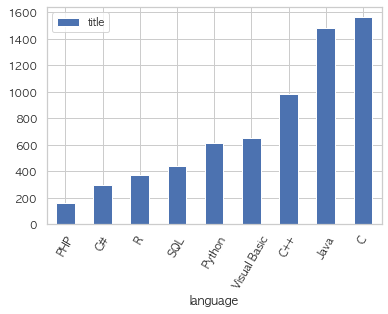

In [125]:
pivot_lang_df.plot.bar(rot=60)

In [59]:
# TIOBE INDEX 순위
need_languages

array(['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'R'], dtype=object)

### 아무래도 언어가 오래될 수록 검색된 책의 양이 많았다
- TIOBE 순위와 언어별 출판량은 다른 결과를 보였음
- 이는 오래된 언어를 포함하였기 때문인 것으로 보임(C, Java)

# 문제 4
- 우리나라의 컴퓨터 언어 관련 출판사 순위 확인

In [60]:
raw_final_df.columns

Index(['title', 'link', 'isbn', 'price', 'author', 'publisher', 'pubdate',
       'language'],
      dtype='object')

In [61]:
pivot_pub_df = raw_final_df.pivot_table(index='publisher', values="title",aggfunc=np.count_nonzero)
pivot_pub_df.sort_values(by='title', ascending=False, inplace=True)
# 너무 많아 50개만 보자
pivot_pub_df.head(30)

,title
publisher,
한빛미디어,347
정보문화사,288
에이콘출판,271
영진닷컴,238
Packt(GCOScience),147
성안당,143
대림,140
홍릉과학출판사,139
인포북,133


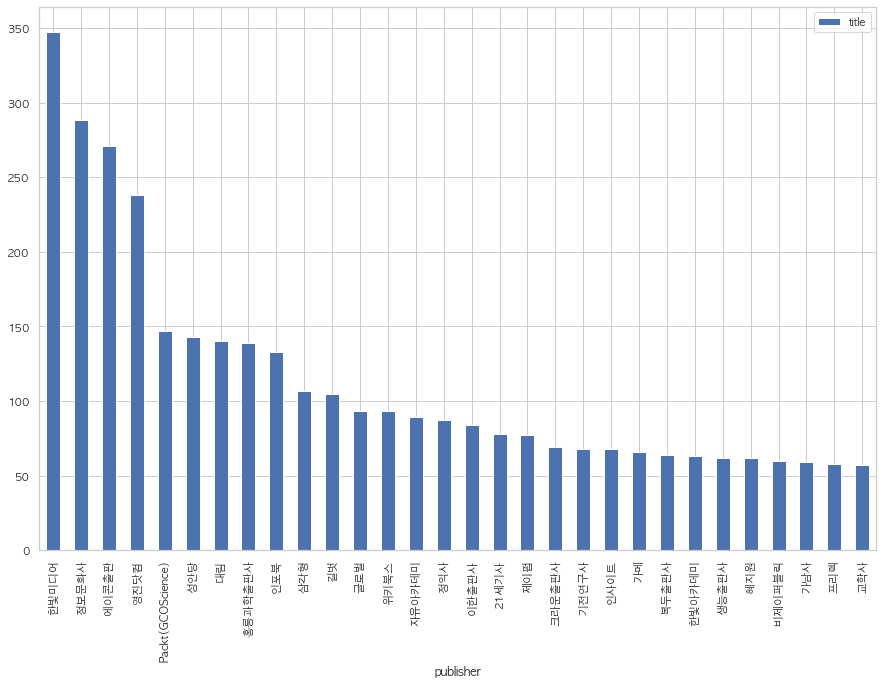

In [132]:
pivot_pub_df.head(30).plot.bar(rot=90,figsize = (15,10));

In [108]:
# 출판량 가장 많은 5개, 언어 순위 3개 선정 박스플랏 그리기
big5 = pivot_pub_df.head(5).index
final_df_pub5 = raw_final_df[raw_final_df['publisher'].isin(big5)]
final_df_pub5 = final_df_pub5[final_df_pub5['language'].isin(need_languages[:3])]
final_df_pub5

,title,link,isbn,price,author,publisher,pubdate,language
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),http://book.naver.com/bookdb/book_detail.php?b...,8956748578 9788956748573,25000.0,이경택|방성수|안상준,정보문화사,2020-10-08,Python
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),http://book.naver.com/bookdb/book_detail.php?b...,8956749094 9788956749099,27000.0,오승환|이경록|김태헌|홍재권,정보문화사,2021-06-30,Python
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,http://book.naver.com/bookdb/book_detail.php?b...,8956749000 9788956749006,25000.0,오승환,정보문화사,2021-01-05,Python
5,AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음),http://book.naver.com/bookdb/book_detail.php?b...,8931463375 9788931463378,23000.0,아즈마 유키나가,영진닷컴,2021-01-15,Python
11,초보자를 위한 파이썬 200제 (Python),http://book.naver.com/bookdb/book_detail.php?b...,8956747342 9788956747347,20000.0,장삼용,정보문화사,2017-02-27,Python
...,...,...,...,...,...,...,...,...
1378,C응용 프로그램(C응용 예제 프로그램),http://book.naver.com/bookdb/book_detail.naver...,2005806000214,7000.0,임홍식,정보문화사,1990-06-01,C
1379,마이크로 소프트 C 6.0(정상에서 만납시다),http://book.naver.com/bookdb/book_detail.naver...,2005806000993,18000.0,한상범,정보문화사,1992-01-01,C
1381,터보 C(초보자도단기간내에정복하는),http://book.naver.com/bookdb/book_detail.naver...,2005806002249,7000.0,신동완,정보문화사,1991-05-01,C
1385,터보 C 활용,http://book.naver.com/bookdb/book_detail.naver...,2005806002300,7000.0,김기형,정보문화사,1991-01-01,C


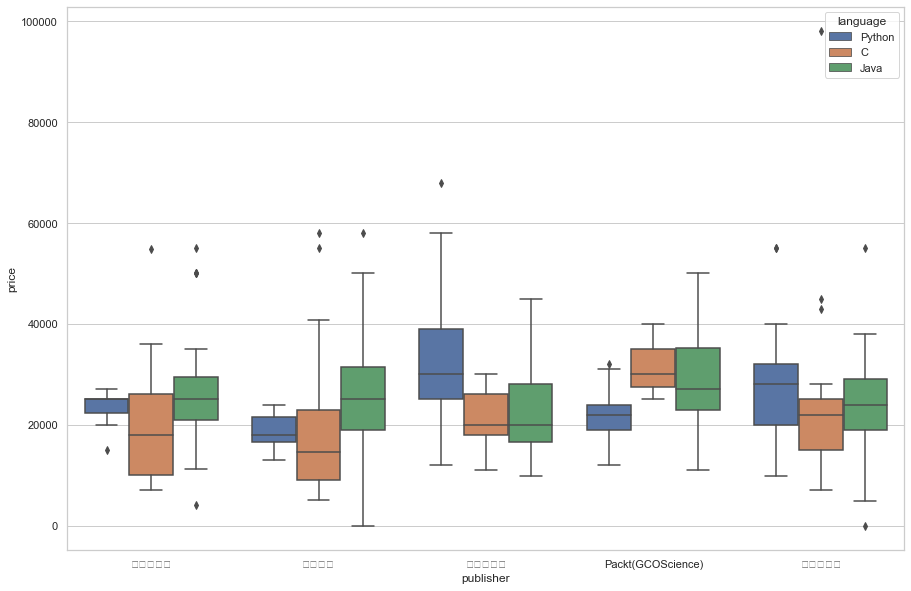

In [127]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.boxplot(x="publisher", y="price", data=final_df_pub5, hue="language")
plt.show()

#### 다른건 한글이 잘나오는데 위 그래프만 깨져서 나옴...
- 이걸 돌리면 다른 그래프도 폰트가 깨지기 시작함...
- 해결방법은 아직 못찼았음
- 어쨌든 출판사별로 언어별 가격이 다름
    - 특별한 특징 없이 천파만별

In [138]:
def draw_pub_bar_plot(language):
    df = raw_final_df[raw_final_df['language'] == language]
    pivot_df = df.pivot_table(index='publisher', values="title",aggfunc=np.count_nonzero)
    pivot_df.sort_values(by='title', ascending=False, inplace=True)
    pivot_df.head(10).plot.bar(rot=90,figsize = (8,5), title=language);

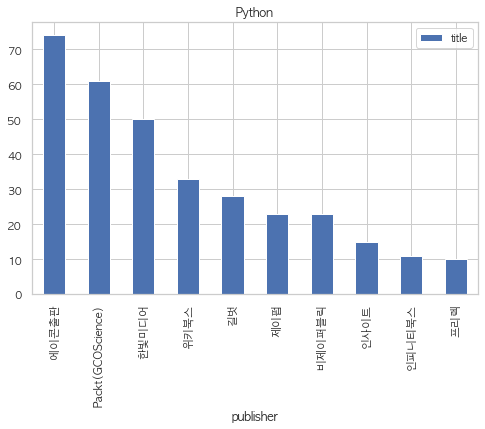

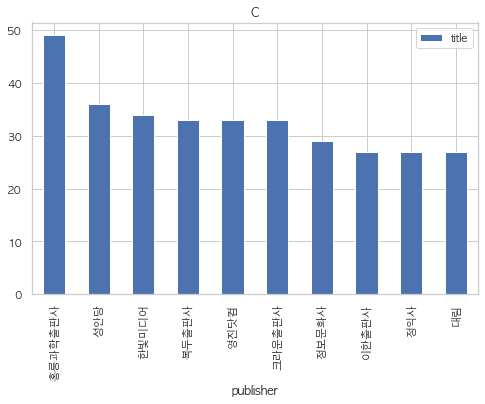

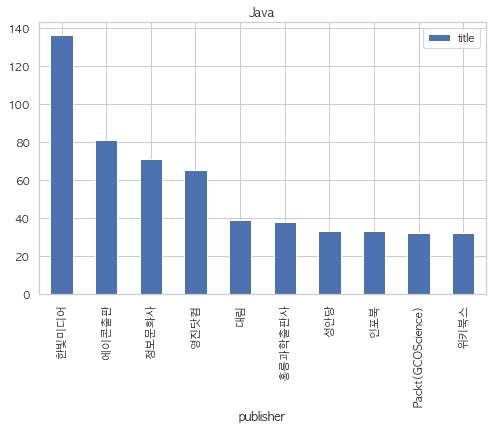

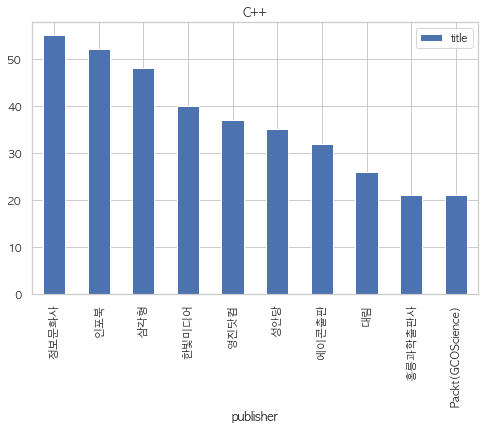

In [139]:
for i in need_languages[:4]:
    draw_pub_bar_plot(i)

#### 언어별 출판사 순위를 확인했을 때 
- 언어별로 순위가 다 다름
- 하지만 한빛미디어,정보문화사, 에이콘출판 등 기존의 상위권 출판사들은 언어와 상관없이 상위권을 유지
- 몇몇 출판사는 특정 언어에 집중하기도 함
    - 홍릉과학출판사는 전체 출판량 순위 8위 인데 C에서는 1위임.
    - 삼각형은 전체 약 110권을 출판했는데 거의 50여권이 C++ 서적임.

# 문제 5
- 최근 2년(20, 21년), 그전 3년(17, 18, 19년) 데이터로 비교

In [143]:

final_df_last2 = raw_final_df[raw_final_df['pubdate'] >= '20200101']
final_df_17_19 = raw_final_df[raw_final_df['pubdate'] >= '20170101']
final_df_17_19 = final_df_17_19[final_df_17_19['pubdate'] <= '20191231']

In [144]:
pivot_lang_df_last2 = final_df_last2.pivot_table(index='language', values="title",aggfunc=np.count_nonzero)
pivot_lang_df_last2.sort_values(by='title', inplace=True)
pivot_lang_df_last2

,title
language,
Visual Basic,3
PHP,5
C#,20
C,30
C++,31
SQL,38
Java,71
R,84
Python,208


<AxesSubplot:xlabel='language'>

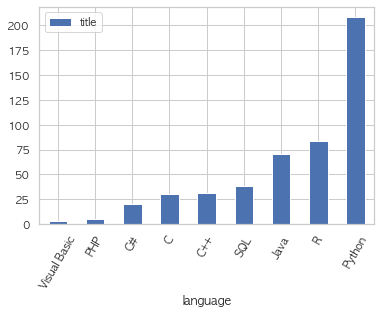

In [145]:
pivot_lang_df_last2.plot.bar(rot=60)

### 최근 2년만 봤을 때 python의 출판량이 가장 많고, R이 2위를 차지하였음.
- 특히 python이 압도적으로 출판량이 많음.
- R은 TIOBE 순위 14위에 비해 출판량은 2위로 차이가 큼.
- 책은 주로 입문서가 많기 때문에, 최신 트렌드에도 영향을 받지만 언어의 난이도에도 영향을 받는 것으로 보임

In [146]:
pivot_lang_df_17_19 = final_df_17_19.pivot_table(index='language', values="title",aggfunc=np.count_nonzero)
pivot_lang_df_17_19.sort_values(by='title', inplace=True)
pivot_lang_df_17_19

,title
language,
Visual Basic,8
PHP,14
C#,44
SQL,53
C++,72
C,82
R,150
Java,193
Python,298


<AxesSubplot:xlabel='language'>

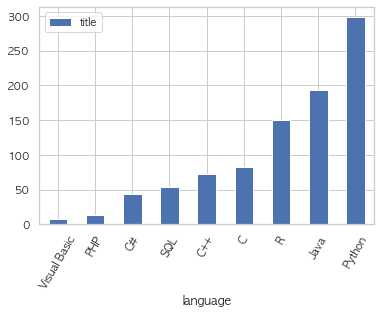

In [147]:
pivot_lang_df_17_19.plot.bar(rot=60)

### 17, 18, 19년(3년치)만 봤을 때 python의 출판량이 가장 많고, Java가 2위를 차지하였음.
- 최근 2년보단 python의 출판량이 적음.
- R은 3위로 여전히 TIOBE의 14위보다는 높음
- 책은 주로 입문서가 많기 때문에, 최신 트렌드에도 영향을 받지만 언어의 난이도에도 영향을 주는 것으로 보임

## 언어별 가격비교

In [148]:
# 전체데이터
pivot_lang_price = raw_final_df.pivot_table(index='language', values='price',aggfunc=np.mean)
pivot_lang_price.sort_values(by='price', ascending=False,inplace=True)
pivot_lang_price

,price
language,
Visual Basic,24686.943164
Python,24606.382979
Java,24381.166464
R,24288.378378
C++,24231.294964
SQL,24070.615034
C#,22908.191126
PHP,20726.114650
C,18096.077886


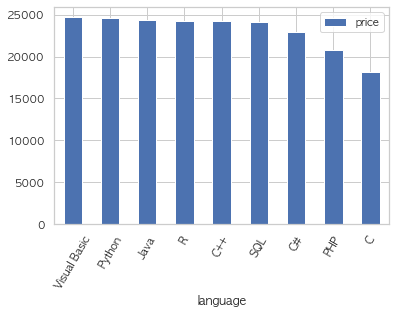

In [149]:
pivot_lang_price.plot.bar(rot=60);

In [162]:
pivot_lang_price.mean()

price    23110.57385
dtype: float64

In [150]:
# 17~19년 데이터
pivot_lang_price_17_19 = final_df_17_19.pivot_table(index='language', values='price',aggfunc=np.mean)
pivot_lang_price_17_19.sort_values(by='price', ascending=False,inplace=True)
pivot_lang_price_17_19

,price
language,
Visual Basic,25500.000000
PHP,24571.428571
Java,24193.333333
R,23828.666667
C#,23434.090909
Python,23398.657718
SQL,22415.094340
C,22131.707317
C++,21779.166667


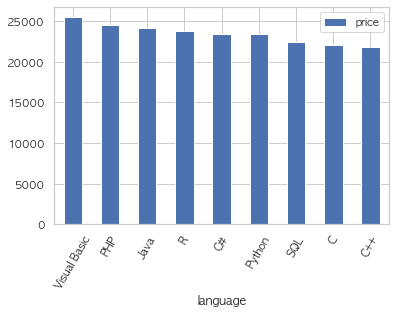

In [151]:
pivot_lang_price_17_19.plot.bar(rot=60);

In [161]:
pivot_lang_price_17_19.mean()

price    23472.460614
dtype: float64

In [152]:
# 최근 2년 데이터
pivot_lang_price_last2 = final_df_last2.pivot_table(index='language', values='price',aggfunc=np.mean)
pivot_lang_price_last2.sort_values(by='price', ascending=False,inplace=True)
pivot_lang_price_last2

,price
language,
Visual Basic,29000.000000
C#,26890.000000
Python,25841.826923
C++,24177.419355
R,23660.714286
SQL,23052.631579
Java,22840.350877
PHP,22000.000000
C,21780.000000


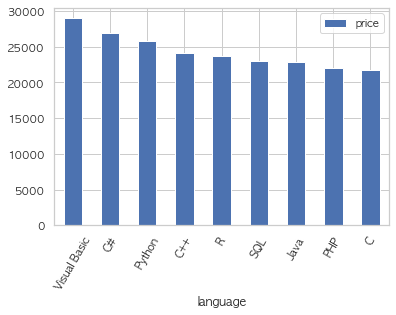

In [153]:
pivot_lang_price_last2.plot.bar(rot=60);

In [160]:
pivot_lang_price_last2.mean()

price    24360.327002
dtype: float64

- 출판량이 작은 Visual Basic이 3구간에서 가장 비쌌음
    - 일반적으로 비인기분야는 가격이 비쌈
    - 수요공급윈칙으로 유추하면 수요보다 공급이 더 적기 때문인듯
- 책값은 조금씩 비싸지고 있음
    - 전체 23110 -> 17-19 23472 -> 최근2년 24360

### 출판사별 가격비교

In [165]:
pivot_pub_price_last2 = final_df_last2.pivot_table(index='publisher', values='price',aggfunc=np.mean)
pivot_pub_price_last2.sort_values(by='price', ascending=False,inplace=True)
pivot_pub_price_last2.head(10)

,price
publisher,
한티에듀,58000.0
서울시립대학교출판부,50000.0
아진,50000.0
동양북스,46800.0
오일러,45000.0
심통,42000.0
투에이치앤에스,42000.0
잇플ITPLE,38900.0
영민,38000.0


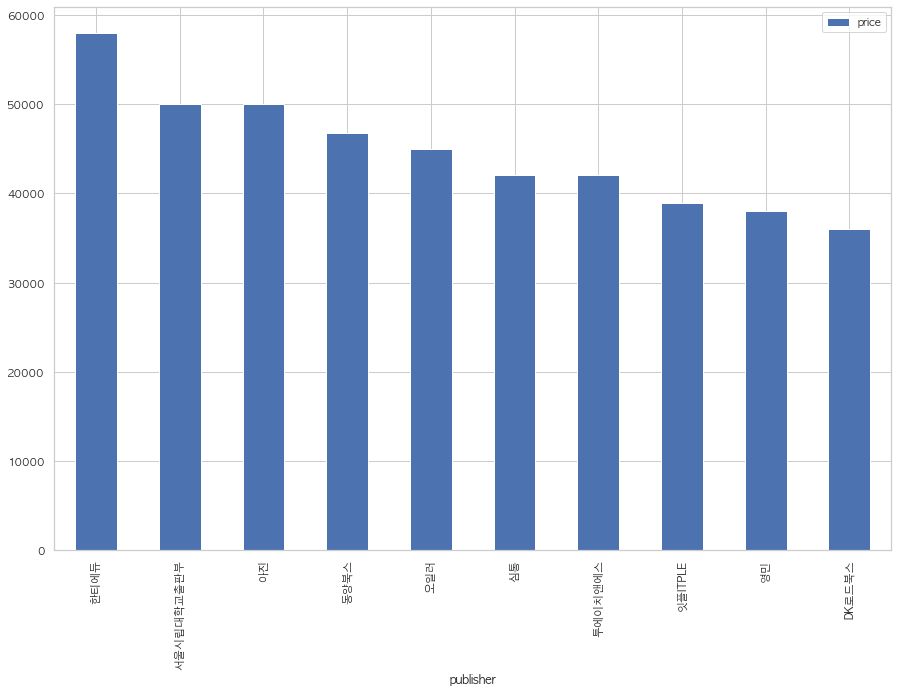

In [155]:
pivot_pub_price_last2.head(10).plot.bar(rot=90,figsize = (15,10));

In [163]:
pivot_pub_price_17_19 = final_df_17_19.pivot_table(index='publisher', values='price',aggfunc=np.mean)
pivot_pub_price_17_19.sort_values(by='price', ascending=False,inplace=True)
pivot_pub_price_17_19.head(10)

,price
publisher,
경상대학교출판부,40000.000000
경희대학교출판문화원,38000.000000
에피스테메,35000.000000
문운당,34000.000000
홍릉(홍릉과학출판사),32000.000000
오픈이지북스,32000.000000
BOOKK(부크크),32000.000000
e퍼플,32000.000000
이지스퍼블리싱,31285.714286


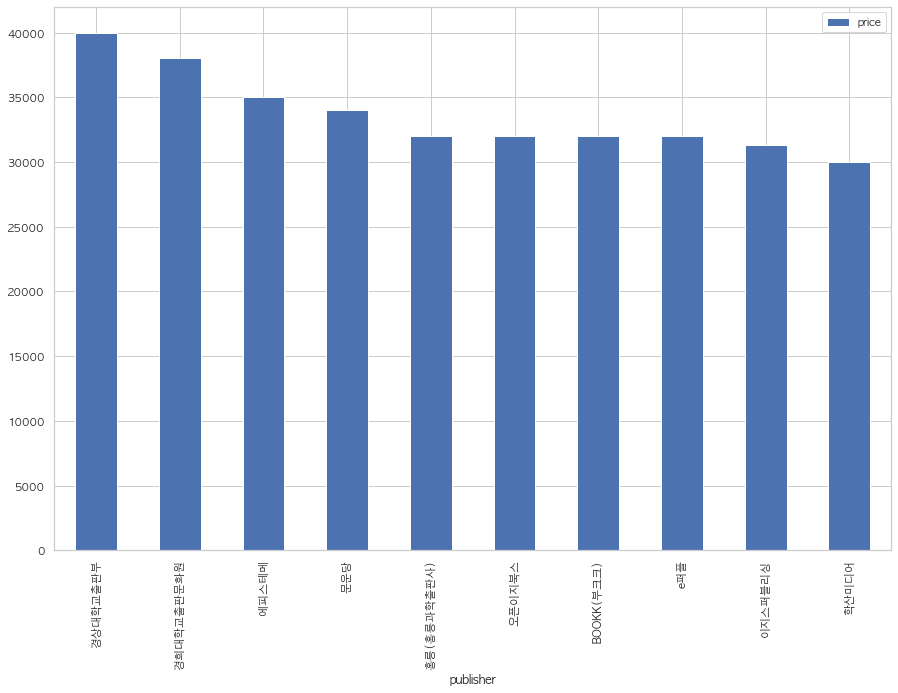

In [164]:
pivot_pub_price_17_19.head(10).plot.bar(rot=90,figsize = (15,10));

- 출판사별 평균가격의 편차가 큼
- 학교와 관련된 출판사가 비싼 가격을 취하는 것으로 보임
    - 경상대학교출판부, 경희대학교출판문화원, 홍릉(홍릉과학출판사) 등